In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.decomposition import PCA

In [10]:
#Load the data file
df = pd.read_csv('SmartWatch Data File.csv')
df

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age
0,3,2,3,3,2,3,3,1,1,1,2,38
1,6,6,6,6,5,3,1,1,0,2,3,38
2,7,4,4,4,6,4,1,0,0,1,3,42
3,7,5,4,5,5,4,4,1,0,2,5,35
4,7,4,2,6,3,2,4,1,0,1,3,36
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,5,5,4,6,5,6,1,0,2,4,37
996,7,7,6,5,5,2,5,1,0,1,5,36
997,5,6,7,7,4,3,5,1,0,1,5,40
998,1,1,4,3,2,4,3,1,0,1,1,39


In [11]:
#Basic descriptive
df.describe()
df.mode()

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age
0,5,5,3,4,5,4,4,1,1,1,3,39


In [12]:
#standardisation
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
scaled_df

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age
0,-1.077527,-1.463057,-0.784680,-0.535521,-1.451216,-0.549373,-1.059359,0.879232,0.875662,-0.704987,-1.149757,0.423752
1,0.835242,1.092501,1.193505,1.377054,0.388095,-0.549373,-2.690397,0.879232,-1.141993,1.418467,-0.259852,0.423752
2,1.472832,-0.185278,-0.125285,0.102004,1.001198,0.125532,-2.690397,-1.137356,-1.141993,-0.704987,-0.259852,1.105848
3,1.472832,0.453612,-0.125285,0.739529,0.388095,0.125532,-0.243840,0.879232,-1.141993,1.418467,1.519958,-0.087820
4,1.472832,-0.185278,-1.444075,1.377054,-0.838112,-1.224278,-0.243840,0.879232,-1.141993,-0.704987,-0.259852,0.082704
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.197653,0.453612,0.534110,0.102004,1.001198,0.800438,1.387198,0.879232,-1.141993,1.418467,0.630053,0.253228
996,1.472832,1.731391,1.193505,0.739529,0.388095,-1.224278,0.571679,0.879232,-1.141993,-0.704987,1.519958,0.082704
997,0.197653,1.092501,1.852899,2.014579,-0.225009,-0.549373,0.571679,0.879232,-1.141993,-0.704987,1.519958,0.764800
998,-2.352706,-2.101947,-0.125285,-0.535521,-1.451216,0.125532,-1.059359,0.879232,-1.141993,-0.704987,-2.039663,0.594276


In [13]:
#calculate distance matrix with euclidian distance 
from scipy.cluster.hierarchy import linkage, dendrogram

ward_clustering = linkage(scaled_df, method="ward", metric="euclidean")
ward_clustering


array([[ 115.        ,  348.        ,    0.        ,    2.        ],
       [ 213.        ,  398.        ,    0.        ,    2.        ],
       [ 368.        ,  729.        ,    0.        ,    2.        ],
       ...,
       [1991.        , 1995.        ,   31.89367825,  376.        ],
       [1993.        , 1994.        ,   41.19687872,  624.        ],
       [1996.        , 1997.        ,   69.76711577, 1000.        ]])

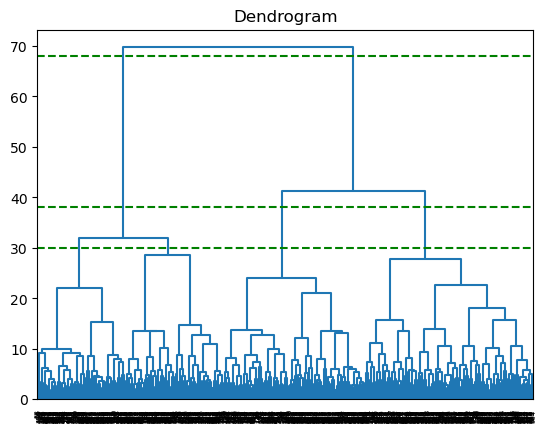

In [14]:
#dendrogram with threshold line

dend = sch.dendrogram(ward_clustering, color_threshold=0)
plt.title("Dendrogram")
plt.axhline(y=38, color='g', linestyle='--')
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=68, color='g', linestyle='--')
plt.savefig('dendrogram.png')
plt.show()


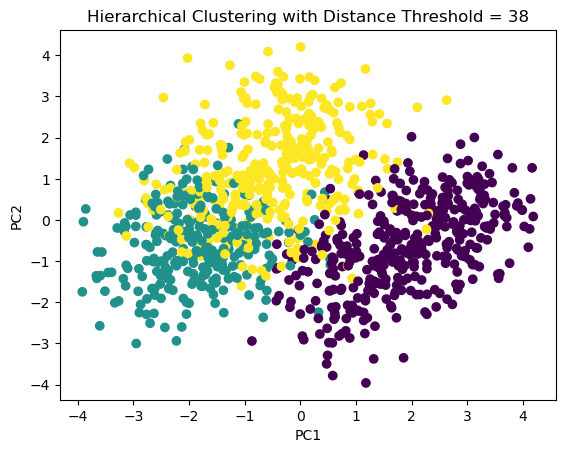

In [15]:
#Cluster
threshold = 38
clusters = fcluster(ward_clustering, t=threshold, criterion='distance')
pca = PCA(n_components=2)
pca_coords = pca.fit_transform(scaled_df)

#PCA illustration
plt.scatter(pca_coords[:,0], pca_coords[:,1], c= clusters)
plt.title(f'Hierarchical Clustering with Distance Threshold = {threshold}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('PCA.png')
plt.show()


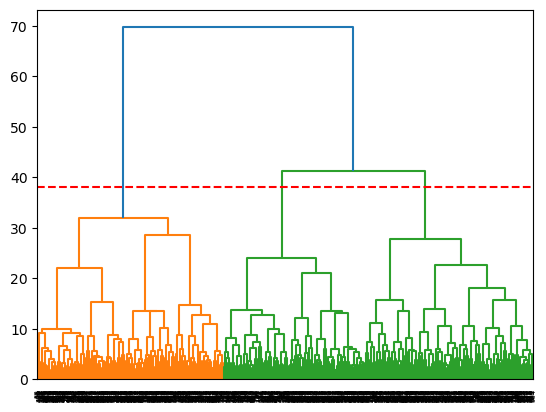

In [16]:
#dendrogram
dendrogram = sch.dendrogram(sch.linkage(scaled_df, method='ward'))
plt.axhline(y=38, color='r', linestyle='--')
plt.show()


In [17]:
#Include clusters into original dataframe

df["Cluster"] = pd.Series(clusters, index = df.index)
df

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age,Cluster
0,3,2,3,3,2,3,3,1,1,1,2,38,2
1,6,6,6,6,5,3,1,1,0,2,3,38,3
2,7,4,4,4,6,4,1,0,0,1,3,42,3
3,7,5,4,5,5,4,4,1,0,2,5,35,3
4,7,4,2,6,3,2,4,1,0,1,3,36,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,5,5,4,6,5,6,1,0,2,4,37,1
996,7,7,6,5,5,2,5,1,0,1,5,36,3
997,5,6,7,7,4,3,5,1,0,1,5,40,3
998,1,1,4,3,2,4,3,1,0,1,1,39,2


In [18]:
# Compute the size of each cluster
cluster_sizes_percent = (df['Cluster'].value_counts())/len(df)
print(cluster_sizes_percent)


1    0.376
3    0.340
2    0.284
Name: Cluster, dtype: float64


In [19]:
#Compute the mean values of each variable of each cluster
cluster_means = df.groupby('Cluster').mean().round(2)

#Combine the mean outcomes with cluster size
cluster_means['ClusterSize'] = pd.Series(cluster_sizes_percent)

cluster_means

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age,ClusterSize
Cluster,,,,,,,,,,,,,
1,4.95,4.37,4.84,4.40,5.78,5.22,5.34,0.76,0.68,1.44,3.62,29.73,0.376
2,3.82,3.32,3.24,2.44,3.28,3.26,3.63,0.27,0.56,1.10,2.64,38.55,0.284
3,5.13,5.01,4.27,4.39,3.71,2.73,3.71,0.59,0.45,1.40,3.47,39.38,0.340


In [54]:
# Load the data
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Cluster'], [df['Female'], df['Degree'], df['Income']])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)


# define a function to conduct the chi-squared test for a variable
def chi_squared_test(var):
    table = pd.crosstab(df[var], df['Cluster'])
    _, p, _, _ = chi2_contingency(table)
    return p

# conduct the chi-squared test for each variable
for var in df.columns[8:12]:
    p = chi_squared_test(var)
    print(f"Variable: {var} - p-value: {p:.3f}")
    
# Print the results
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")


Variable: Female - p-value: 0.000
Variable: Degree - p-value: 0.000
Variable: Income - p-value: 0.000
Variable: Age - p-value: 0.000
Chi-square statistic: 319.1898
P-value: 0.0000
Degrees of freedom: 36


In [55]:
#Anova
from scipy import stats
independent_var = 'Cluster'
dependent_var = ['ConstCom', 'TimelyInf', 'TaskMgm', 'DeviceSt', 'Wellness', 'Athlete', 'Style', 'AmznP', 'Female', 'Degree', 'Income', 'Age']

for var in dependent_var:
    group1 = df[var][df[independent_var] == 1]
    group2 = df[var][df[independent_var] == 2]
    group3 = df[var][df[independent_var] == 3]
    f_value, p_value = stats.f_oneway(group1, group2, group3)
    print(f'{var}:\n\tF-Value: {f_value}\n\tP-Value: {p_value}\n')

ConstCom:
	F-Value: 70.05564202352822
	P-Value: 3.402171869294387e-29

TimelyInf:
	F-Value: 110.07296862209378
	P-Value: 6.400641613795756e-44

TaskMgm:
	F-Value: 110.21821319739723
	P-Value: 5.682767405650496e-44

DeviceSt:
	F-Value: 228.54265356718216
	P-Value: 1.9882829511154908e-82

Wellness:
	F-Value: 434.36558545627366
	P-Value: 2.1442544846795093e-136

Athlete:
	F-Value: 636.879398534767
	P-Value: 6.284782490098975e-179

Style:
	F-Value: 384.31814090249225
	P-Value: 1.85894283642055e-124

AmznP:
	F-Value: 94.39308133588214
	P-Value: 2.8665328874440033e-38

Female:
	F-Value: 18.70414194204357
	P-Value: 1.060668015812326e-08

Degree:
	F-Value: 54.653867040244265
	P-Value: 3.0017608334087103e-23

Income:
	F-Value: 78.76362249823175
	P-Value: 1.7420061453584448e-32

Age:
	F-Value: 718.2527905925085
	P-Value: 6.496981440149477e-194



# 